# 罗德里格斯变换
旋转向量（1x3）与旋转矩阵（3x3），以通过罗德里格斯相互转化。首先，我们学习下三维空间中旋转的表示。
# 旋转的表示
  处理三维旋转问题时，通常采用旋转矩阵的方式来描述旋转变换。旋转矩阵有以下两种方式得到。


   物体在三维空间中的旋转，可以被分为解为在直接坐标系下，分别先后围绕x,y,z坐标轴旋转得到。旋转的角度也就是我们常听到的角度roll，pitch，yew。如果已知这几个角度，就可以直接通过每一步的矩阵相乘得到整个旋转矩阵。
$$
R=R(yew)R(pitch)R(roll)
$$

 旋转矩阵还可以理解为围绕空间中某一个向量，直接一次旋转某一个角度得到。在openCV相机标定时得到的旋转向量r就是用这种方式。即由旋转变量来描述。
# 旋转向量得到旋转矩阵

旋转向量的长度（模）表示绕轴逆时针旋转的角度（弧度）。旋转向量与旋转矩阵可以通过罗德里格斯（Rodrigues）变换进行转换。先求得：

$$
\begin{cases}
\theta=norm(r) \qquad \text{旋转角度}\\
r=\frac{r}{\theta} \qquad \text{单位向量}
\end{cases}
$$
那么，应用罗德里格斯变换,可以得到旋转矩阵：
$$
R=cos(\theta)I_{3*3}+(1-cos(\theta))rr^t+sin(\theta)\begin{bmatrix}
0&-r_z&r_y \\
r_z & 0 & -r_x \\
-r_y & r_x & 0 
\end{bmatrix}
$$


# 罗德里格斯变换推导
# 1.向量的点乘和叉乘
向量的点乘和叉乘是向量的基本运算，这里直接给出公式:
$$
v \cdot k=|v||k|cos\langle v,k \rangle \\
v \times k =|v||k|sin\langle v,k \rangle
$$
这里需要注意的是$v \times k$的结果是向量，方向垂直于$v,k$平面，并且遵守右手法则,如下图所示:


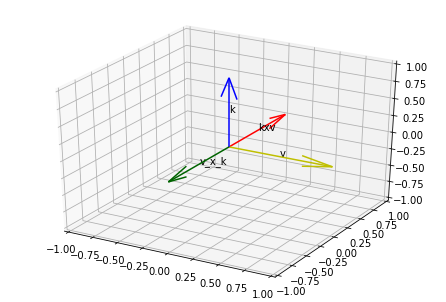

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
v=np.array([1,0,0])
k=np.array([0,0,1])
k_x_v=np.cross(k,v)
v_x_k=np.cross(v,k)
fig = plt.figure()
ax = Axes3D(fig)
ax.quiver(0, 0, 0, *k, color='b')
ax.text(*(k/2),'k')
ax.quiver(0,0,0,*v,color='y')
ax.text(*(v / 2), 'v')
ax.quiver(0,0,0,*k_x_v,color='r')
ax.text(*(k_x_v / 2), 'kxv')
ax.quiver(0, 0, 0, *v_x_k, color='darkgreen')
ax.text(*(v_x_k / 2), 'v_x_k')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
plt.show()

可以看到叉乘是不满足交换律的。

# 2.旋转向量和目标垂直时
这里，我们假设有向量$v$,我们将它绕向量$k$旋转$\theta$度，这里的$k$是单位向量，且与$v$垂直，这样旋转之后的向量是$v_{rot}$,如下图所示:

![图1](https://i.ibb.co/hZWQmwS/Snipaste-2019-11-08-16-44-12.png)

这里我们需要得到旋转之后的向量$v_{rot}$,这个向量可以分解为沿着$v$方向的向量$v_{rot}^{l}$和垂直于$v$的向量$v_{rot}^{p}$,对应的俯视图如下：

![替代文字](https://i.ibb.co/bBfCK1L/Snipaste-2019-11-08-17-10-26.png)

那么：

$$
v_{rot}=v_{rot}^l+v_{rot}^p
$$
由几何关系，我们知道$|v_{rot}^l|=cos(\theta)|v|$,而他们的方向又相同，所以:
$$
v_{rot}^l=cos(\theta)v
$$
然后，$|v_{rot}^p|=sin(\theta)|v|$,但是这个向量的方向怎么表示呢？由向量的叉乘性质，我们可以知道$v_{rot}^p$和$k \times v$的方向平行，而$k \times v=|k||v|sin \langle k,v \rangle$,这里的$k$是单位向量，而且与$v$垂直，所以$k \times v=|v|$,那么这个方向上的单位向量$j$可以表示为$j=\frac{k \times v}{|v|}$,那么$v_{rot}^p=sin(\theta)(k \times v)$,那么$k,v$垂直时，有如下公式:
$$
\begin{align}
v_{rot}&=v_{rot}^l+v_{rot}^p \\
&=cos(\theta)v+sin(\theta)(k \times v)
\end{align}
$$


# 3.旋转向量和目标不垂直时
以上部分是旋转向量$k$与$v$垂直时的公式，但是更一般的情况是$k$和$v$并垂直，这种情况的处理也很简单，我们只需要将向量$v$分解为平行于$k$的向量$v^l$和垂直于$k$的向量$v^p$,如下图: